In [1]:
import submitit
import os
import glob
import numpy as np
import pandas as pd
import mne
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
os.getenv('IBLOSCDIR')

In [ ]:
# load pcfg (from project_config.json)
import json
pcfg = json.load(open(os.path.join(os.getenv('IBLOSCDIR'),'project_config.json'),'r'))


Using a threshold of 2.144787
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 283 clusters


/tmp/ipykernel_3544655/3498151798.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:02<00:00,  366.76it/s]


Using a threshold of 2.109816
stat_fun(H1): min=-5.094817703426454 max=6.420371751303881
Running initial clustering …
Found 247 clusters


100%|██████████| Permuting : 1023/1023 [00:02<00:00,  381.30it/s]


Using a threshold of 2.059539
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 258 clusters


/tmp/ipykernel_3544655/3498151798.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:04<00:00,  253.41it/s]


Using a threshold of 2.039513
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 252 clusters


/tmp/ipykernel_3544655/3498151798.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:03<00:00,  298.54it/s]


Using a threshold of 2.048407
stat_fun(H1): min=-3.136954846989376 max=6.185456615017653
Running initial clustering …
Found 260 clusters


100%|██████████| Permuting : 1023/1023 [00:04<00:00,  209.06it/s]


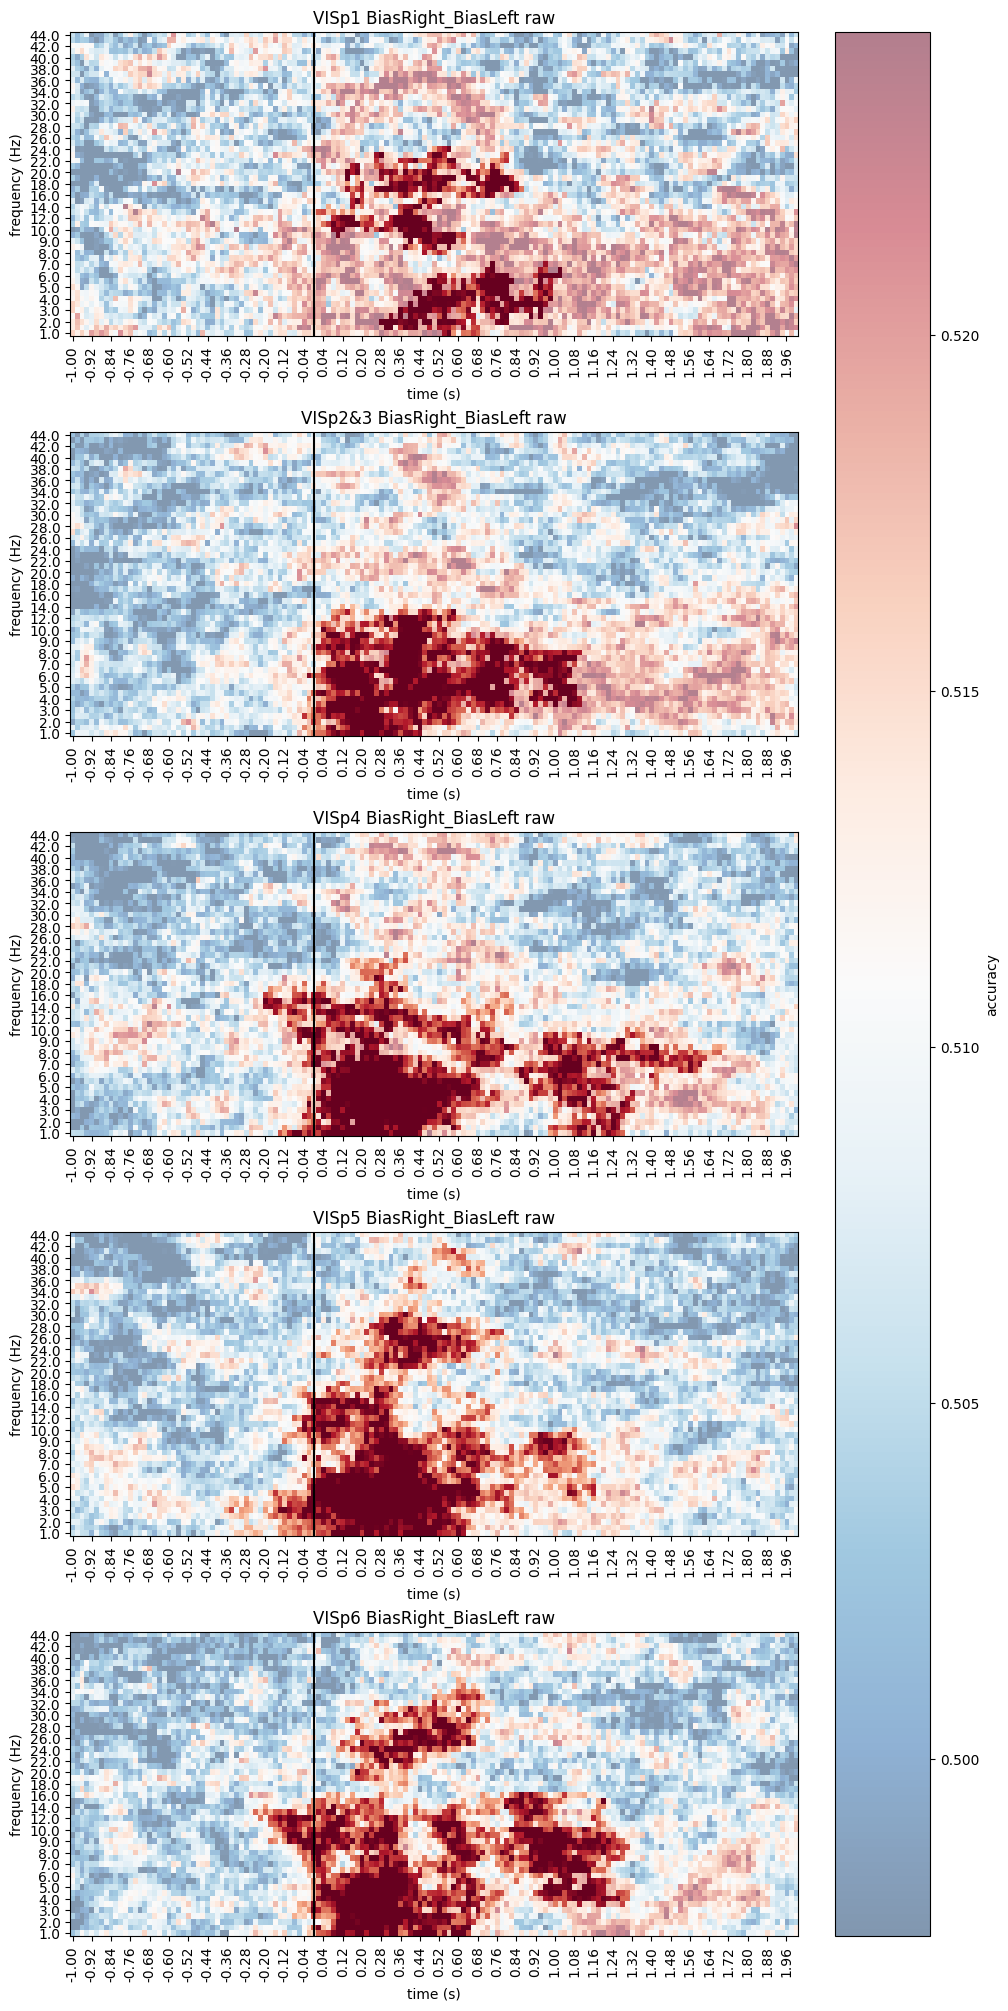

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import mne

# Configuration variables
version = 'raw'  # 'csd', 'raw', 'bipolar'
condition = 'BiasRight_BiasLeft'  # 'Stim_NoStim', 'Right_Left', 'BiasRight_BiasLeft'
basedir = '/mnt/data/AdaptiveControl/IBLrawdata/TF_decoding'
layer_names = ['VISp1', 'VISp2&3', 'VISp4', 'VISp5', 'VISp6']

# Plotting settings
xtimes_decim = 4
yfreqs_decim = 2

# Create a figure for all layers
fig, axes = plt.subplots(len(layer_names), 1, figsize=(10, len(layer_names) * 4), constrained_layout=True)

for i, layer_name in enumerate(layer_names):
    filefilter = f'{basedir}/**/decodeTF_{condition}_{layer_name}_{version}_results_tdiv10_fdiv1.pkl'
    filelist = glob.glob(filefilter)

    # Load group data
    for f, filepath in enumerate(filelist):
        with open(filepath, "rb") as input_file:
            data = pickle.load(input_file)
        # Initialize based on dimensions
        if f == 0:
            gdata = np.zeros((len(filelist), data['TFfreqs'].shape[0], data['TFtimes'].shape[0])) * np.nan
        gdata[f, :, :] = data['TFdecoding'] - 0.5

    T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')

    mean_gdata = np.nanmean(gdata, axis=0)
    T_obs = mean_gdata + 0.5
    T_obs_plot = np.nan * np.ones_like(T_obs)
    for c, p_val in zip(clusters, cluster_pv):
        if p_val <= 0.05:
            T_obs_plot[c] = T_obs[c]

    final_times = data['TFtimes']
    final_freqs = data['TFfreqs']

    ax = axes[i]  # Get the current axis for this layer

    vmax = np.nanpercentile(T_obs, [5, 95])[1]
    vmin = np.nanpercentile(T_obs, [5, 95])[0]
    im = ax.imshow(
        T_obs,
        cmap=plt.cm.RdBu_r,
        aspect="auto",
        origin="lower",
        alpha=0.5,
        vmin=vmin,
        vmax=vmax,
    )
    ax.imshow(
        T_obs_plot,
        cmap=plt.cm.RdBu_r,
        aspect="auto",
        origin="lower",
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_title(f'{layer_name} {condition} {version}')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('frequency (Hz)')
    ax.axvline(x=np.where(final_times == 0)[0][0], c='k')
    ax.set_xticks(ticks=np.arange(0, len(final_times), xtimes_decim),
                  labels=[f'{final_times[i]:.2f}' for i in range(0, len(final_times), xtimes_decim)], rotation=90)
    ax.set_yticks(ticks=np.arange(0, len(final_freqs), yfreqs_decim),
                  labels=[final_freqs[i] for i in range(0, len(final_freqs), yfreqs_decim)])

fig.colorbar(im, ax=axes, orientation='vertical', label='accuracy')
plt.show()


Using a threshold of 2.160369
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 35 clusters


/tmp/ipykernel_3544655/2773733142.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:02<00:00,  393.02it/s]


Using a threshold of 2.119905
stat_fun(H1): min=-5.587074973572655 max=5.030460507275479
Running initial clustering …
Found 192 clusters


100%|██████████| Permuting : 1023/1023 [00:02<00:00,  398.72it/s]


Using a threshold of 2.068658
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 119 clusters


/tmp/ipykernel_3544655/2773733142.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:03<00:00,  318.58it/s]


Using a threshold of 2.048407
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 155 clusters


/tmp/ipykernel_3544655/2773733142.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:03<00:00,  261.65it/s]


Using a threshold of 2.051831
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 207 clusters


/tmp/ipykernel_3544655/2773733142.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:03<00:00,  337.33it/s]


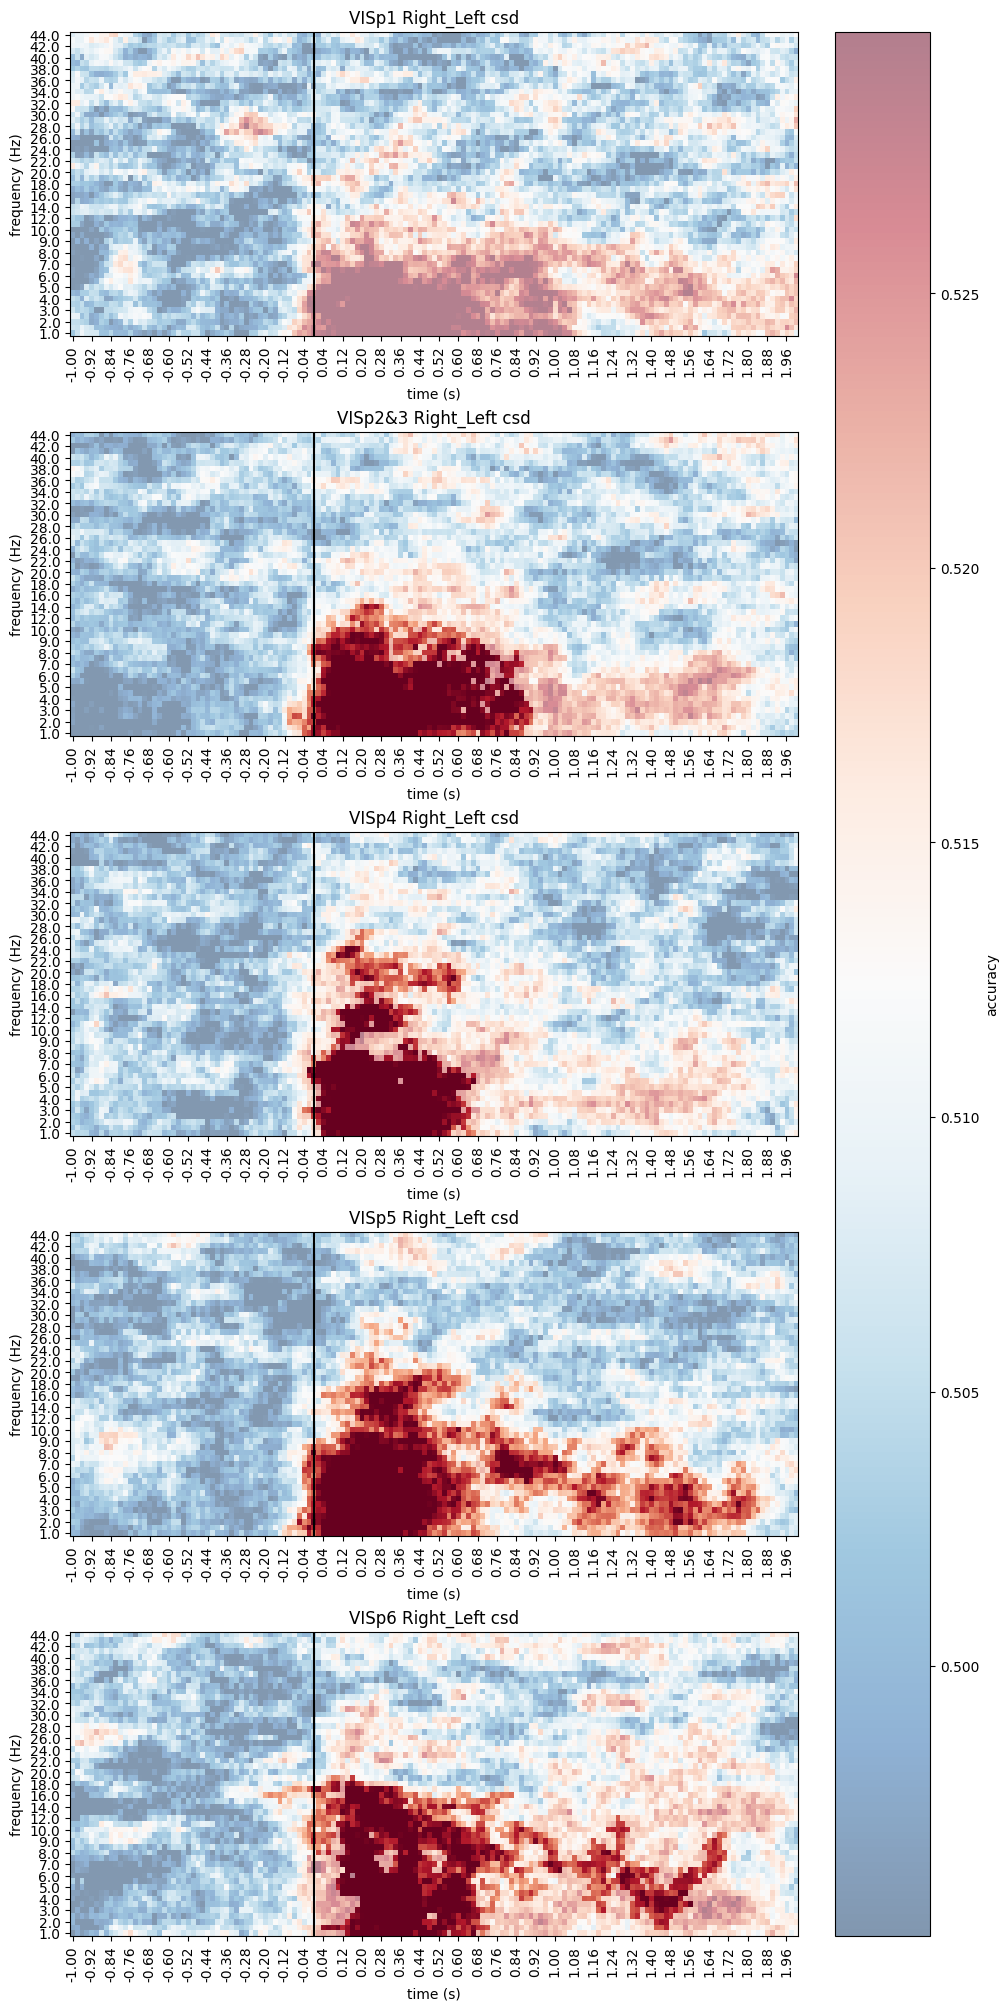

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import mne

# Configuration variables
version = 'csd'  # 'csd', 'raw', 'bipolar'
condition = 'Right_Left'  # 'Stim_NoStim', 'Right_Left', 'BiasRight_BiasLeft'
basedir = '/mnt/data/AdaptiveControl/IBLrawdata/TF_decoding'
layer_names = ['VISp1', 'VISp2&3', 'VISp4', 'VISp5', 'VISp6']

# Plotting settings
xtimes_decim = 4
yfreqs_decim = 2

# Create a figure for all layers
fig, axes = plt.subplots(len(layer_names), 1, figsize=(10, len(layer_names) * 4), constrained_layout=True)

for i, layer_name in enumerate(layer_names):
    filefilter = f'{basedir}/**/decodeTF_{condition}_{layer_name}_{version}_results_tdiv10_fdiv1.pkl'
    filelist = glob.glob(filefilter)

    # Load group data
    for f, filepath in enumerate(filelist):
        with open(filepath, "rb") as input_file:
            data = pickle.load(input_file)
        # Initialize based on dimensions
        if f == 0:
            gdata = np.zeros((len(filelist), data['TFfreqs'].shape[0], data['TFtimes'].shape[0])) * np.nan
        gdata[f, :, :] = data['TFdecoding'] - 0.5

    T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')

    mean_gdata = np.nanmean(gdata, axis=0)
    T_obs = mean_gdata + 0.5
    T_obs_plot = np.nan * np.ones_like(T_obs)
    for c, p_val in zip(clusters, cluster_pv):
        if p_val <= 0.05:
            T_obs_plot[c] = T_obs[c]

    final_times = data['TFtimes']
    final_freqs = data['TFfreqs']

    ax = axes[i]  # Get the current axis for this layer

    vmax = np.nanpercentile(T_obs, [5, 95])[1]
    vmin = np.nanpercentile(T_obs, [5, 95])[0]
    im = ax.imshow(
        T_obs,
        cmap=plt.cm.RdBu_r,
        aspect="auto",
        origin="lower",
        alpha=0.5,
        vmin=vmin,
        vmax=vmax,
    )
    ax.imshow(
        T_obs_plot,
        cmap=plt.cm.RdBu_r,
        aspect="auto",
        origin="lower",
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_title(f'{layer_name} {condition} {version}')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('frequency (Hz)')
    ax.axvline(x=np.where(final_times == 0)[0][0], c='k')
    ax.set_xticks(ticks=np.arange(0, len(final_times), xtimes_decim),
                  labels=[f'{final_times[i]:.2f}' for i in range(0, len(final_times), xtimes_decim)], rotation=90)
    ax.set_yticks(ticks=np.arange(0, len(final_freqs), yfreqs_decim),
                  labels=[final_freqs[i] for i in range(0, len(final_freqs), yfreqs_decim)])

fig.colorbar(im, ax=axes, orientation='vertical', label='accuracy')
plt.show()


Using a threshold of 2.144787
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 261 clusters


/tmp/ipykernel_3584974/2623551802.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
/home/mohammad.keshtkar/miniconda3/envs/crnlenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Permuting : 1023/1023 [00:03<00:00,  323.22it/s]


Using a threshold of 2.109816
stat_fun(H1): min=-3.087800838191356 max=9.371576597680793
Running initial clustering …
Found 183 clusters


100%|██████████| Permuting : 1023/1023 [00:03<00:00,  282.55it/s]


Using a threshold of 2.059539
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 143 clusters


/tmp/ipykernel_3584974/2623551802.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:03<00:00,  259.49it/s]


Using a threshold of 2.045230
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 162 clusters


/tmp/ipykernel_3584974/2623551802.py:33: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')
100%|██████████| Permuting : 1023/1023 [00:04<00:00,  247.43it/s]


Using a threshold of 2.048407
stat_fun(H1): min=-2.8761102199795743 max=10.264624652929045
Running initial clustering …
Found 139 clusters


100%|██████████| Permuting : 1023/1023 [00:04<00:00,  236.03it/s]


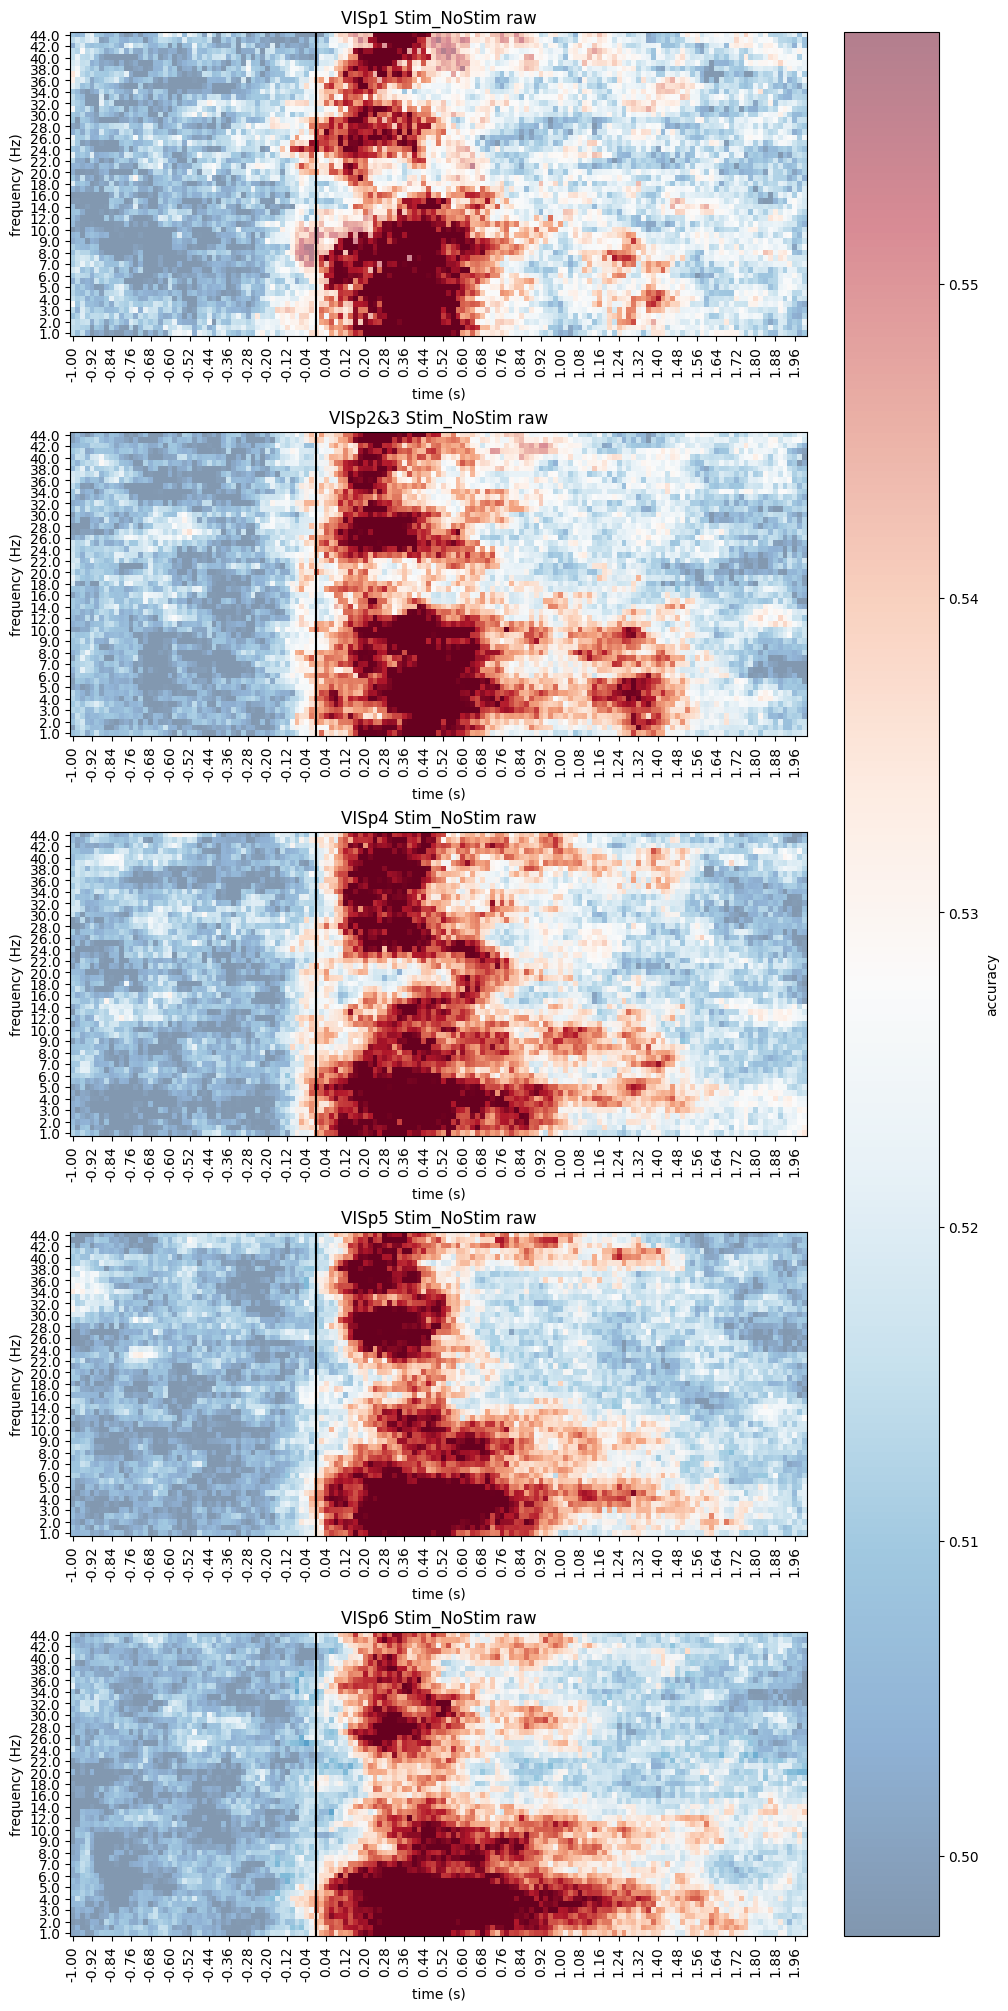

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import mne

# Configuration variables
version = 'raw'  # 'csd', 'raw', 'bipolar'
condition = 'Stim_NoStim'  # 'Stim_NoStim', 'Right_Left', 'BiasRight_BiasLeft'
basedir = '/mnt/data/AdaptiveControl/IBLrawdata/TF_decoding'
layer_names = ['VISp1', 'VISp2&3', 'VISp4', 'VISp5', 'VISp6']

# Plotting settings
xtimes_decim = 4
yfreqs_decim = 2

# Create a figure for all layers
fig, axes = plt.subplots(len(layer_names), 1, figsize=(10, len(layer_names) * 4), constrained_layout=True)

for i, layer_name in enumerate(layer_names):
    filefilter = f'{basedir}/**/decodeTF_{condition}_{layer_name}_{version}_results_tdiv10_fdiv1.pkl'
    filelist = glob.glob(filefilter)

    # Load group data
    for f, filepath in enumerate(filelist):
        with open(filepath, "rb") as input_file:
            data = pickle.load(input_file)
        # Initialize based on dimensions
        if f == 0:
            gdata = np.zeros((len(filelist), data['TFfreqs'].shape[0], data['TFtimes'].shape[0])) * np.nan
        gdata[f, :, :] = data['TFdecoding'] - 0.5

    T_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(gdata, out_type='mask')

    mean_gdata = np.nanmean(gdata, axis=0)
    T_obs = mean_gdata + 0.5
    T_obs_plot = np.nan * np.ones_like(T_obs)
    for c, p_val in zip(clusters, cluster_pv):
        if p_val <= 0.05:
            T_obs_plot[c] = T_obs[c]

    final_times = data['TFtimes']
    final_freqs = data['TFfreqs']

    ax = axes[i]  # Get the current axis for this layer

    vmax = np.nanpercentile(T_obs, [5, 95])[1]
    vmin = np.nanpercentile(T_obs, [5, 95])[0]
    im = ax.imshow(
        T_obs,
        cmap=plt.cm.RdBu_r,
        aspect="auto",
        origin="lower",
        alpha=0.5,
        vmin=vmin,
        vmax=vmax,
    )
    ax.imshow(
        T_obs_plot,
        cmap=plt.cm.RdBu_r,
        aspect="auto",
        origin="lower",
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_title(f'{layer_name} {condition} {version}')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('frequency (Hz)')
    ax.axvline(x=np.where(final_times == 0)[0][0], c='k')
    ax.set_xticks(ticks=np.arange(0, len(final_times), xtimes_decim),
                  labels=[f'{final_times[i]:.2f}' for i in range(0, len(final_times), xtimes_decim)], rotation=90)
    ax.set_yticks(ticks=np.arange(0, len(final_freqs), yfreqs_decim),
                  labels=[final_freqs[i] for i in range(0, len(final_freqs), yfreqs_decim)])

fig.colorbar(im, ax=axes, orientation='vertical', label='accuracy')
plt.show()
